In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
label_modularity = "Cat2"

In [3]:
train_filename = '2Dataset/train_40k.csv'
train_data = pd.read_csv(train_filename)

In [4]:
#Count labels and empty texts
num_labels = num_unique_labels = train_data[label_modularity].nunique()
print(num_labels)
empty_text_count = (train_data['Text'] == '').sum()
print(empty_text_count)
num_rows = train_data.shape[0]
print(num_rows)

64
0
40000


In [5]:
#Count texts of each category
category_counts = train_data[label_modularity].value_counts()
print("Número de textos por categoría:")
pd.set_option('display.max_rows', None)
total_count = category_counts.sum()
print(total_count)
print(category_counts)
pd.reset_option('display.max_rows')

Número de textos por categoría:
40000
Cat2
personal care                       2852
dogs                                2610
nutrition wellness                  2203
health care                         2002
cats                                1779
hair care                           1773
games                               1525
skin care                           1341
medical supplies equipment          1289
fragrance                           1237
diapering                           1095
electronics for kids                1073
action toy figures                  1066
baby toddler toys                   1041
feeding                             1016
household supplies                   984
pantry staples                       945
dolls accessories                    922
beverages                            866
makeup                               753
nursery                              748
gear                                 725
safety                               680
stuffed animal

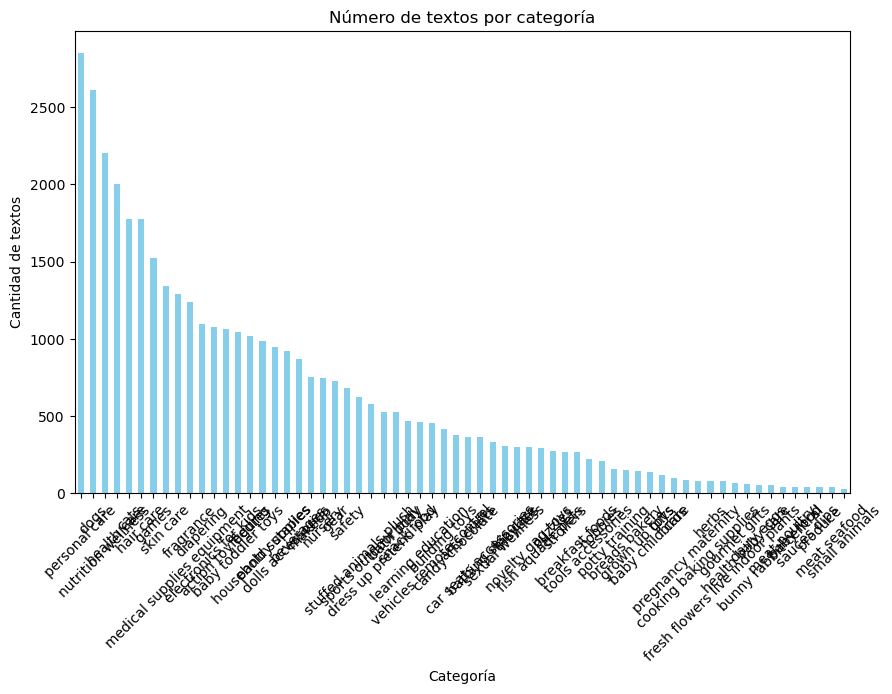

In [6]:
#Plot text amounts
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Número de textos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de textos')
plt.xticks(rotation=45)
plt.show()

In [7]:
#Find the shortest and largest text
min_length = train_data['Text'].apply(len).min()
max_length = train_data['Text'].apply(len).max()
print(f"Longitud del texto más corto: {min_length} caracteres")
print(f"Longitud del texto más largo: {max_length} caracteres")

Longitud del texto más corto: 1 caracteres
Longitud del texto más largo: 6589 caracteres


In [8]:
#Find the class with more text and the class with less

# Crear un diccionario para almacenar los conteos de palabras por categoría
word_counts_by_category = {}

# Iterar sobre cada fila del DataFrame
for index, row in train_data.iterrows():
    text = row['Text']
    category = row['Cat2']
    
    # Tokenizar el texto en palabras (asumiendo palabras separadas por espacios)
    words = re.findall(r'\w+', str(text).lower())  # Obtener todas las palabras en minúsculas
    
    # Contar las palabras en este texto
    word_count = len(words)  # Contar solo el número de palabras en el texto
    
    # Actualizar el diccionario de conteos por categoría
    if category in word_counts_by_category:
        word_counts_by_category[category] += word_count
    else:
        word_counts_by_category[category] = word_count

# Crear una lista de tuplas (categoria, total de palabras) para ordenar
category_word_counts = [(category, total_words) for category, total_words in word_counts_by_category.items()]

# Ordenar la lista de tuplas por el total de palabras (segundo elemento de la tupla)
category_word_counts_sorted = sorted(category_word_counts, key=lambda x: x[1], reverse=True)

# Mostrar los resultados de conteo por categoría ordenados de menor a mayor
for category, total_words in category_word_counts_sorted:
    print(f'Categoría: {category}, Total de palabras: {total_words}')

Categoría: personal care, Total de palabras: 245055
Categoría: dogs, Total de palabras: 227255
Categoría: nutrition wellness, Total de palabras: 185036
Categoría: cats, Total de palabras: 181561
Categoría: health care, Total de palabras: 170758
Categoría: hair care, Total de palabras: 149002
Categoría: games, Total de palabras: 129984
Categoría: skin care, Total de palabras: 112938
Categoría: feeding, Total de palabras: 104384
Categoría: electronics for kids, Total de palabras: 103189
Categoría: action toy figures, Total de palabras: 94948
Categoría: baby toddler toys, Total de palabras: 93596
Categoría: medical supplies equipment, Total de palabras: 92655
Categoría: diapering, Total de palabras: 88272
Categoría: dolls accessories, Total de palabras: 79004
Categoría: gear, Total de palabras: 75509
Categoría: fragrance, Total de palabras: 75026
Categoría: household supplies, Total de palabras: 74251
Categoría: safety, Total de palabras: 72636
Categoría: pantry staples, Total de palabras